<a href="https://colab.research.google.com/github/tunglinwood/Learning-Material/blob/main/Using_SVM_SCV_and_sktime_to_predict_and_forecast_the_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas==2.2.0
!pip install scikit-learn
!pip install pandas_datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.6 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 56.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.3 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=852600 sha256=97f503625899a48b3842f81c

In [2]:
import pandas as pd
print(pd.__version__)

2.2.0


/tmp/ipykernel_2297/1804728916.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Setup Complete")

Setup Complete


In [4]:
data = yf.download('AAPL', start = '2012-01-01', end='2024-03-14')
data = pd.DataFrame(data['Close'])

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2024-03-07,169.000000
2024-03-08,170.729996
2024-03-11,172.750000


In [6]:
data['Returns'] = np.log(data / data.shift())

In [7]:
data

,Close,Returns
Date,,
2012-01-03,14.686786,NaN
2012-01-04,14.765714,0.005360
2012-01-05,14.929643,0.011041
2012-01-06,15.085714,0.010400
2012-01-09,15.061786,-0.001587
...,...,...
2024-03-07,169.000000,-0.000710
2024-03-08,170.729996,0.010185
2024-03-11,172.750000,0.011762


In [8]:
#To see if there is any null value
data.isnull().sum()

Close      0
Returns    1
dtype: int64

In [9]:
#In case there is null value, we use dropna and change to the original data directly using inplace=True
data.dropna(inplace=True)

In [10]:
#set a separate value to shift the data by 6 steps, we can change this value anytime if needed. lagged time as feature is a common method used in the time-series data analysis
lags=6

In [11]:
cols=[]
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [12]:
data

,Close,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2012-01-12,15.049643,-0.002749,-1.0,1.0,-1.0,1.0,1.0,1.0
2012-01-13,14.993214,-0.003757,-1.0,-1.0,1.0,-1.0,1.0,1.0
2012-01-17,15.167857,0.011581,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2012-01-18,15.325357,0.010330,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2012-01-19,15.276786,-0.003174,1.0,1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...
2024-03-07,169.000000,-0.000710,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2024-03-08,170.729996,0.010185,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2024-03-11,172.750000,0.011762,1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']


<Axes: xlabel='Date'>

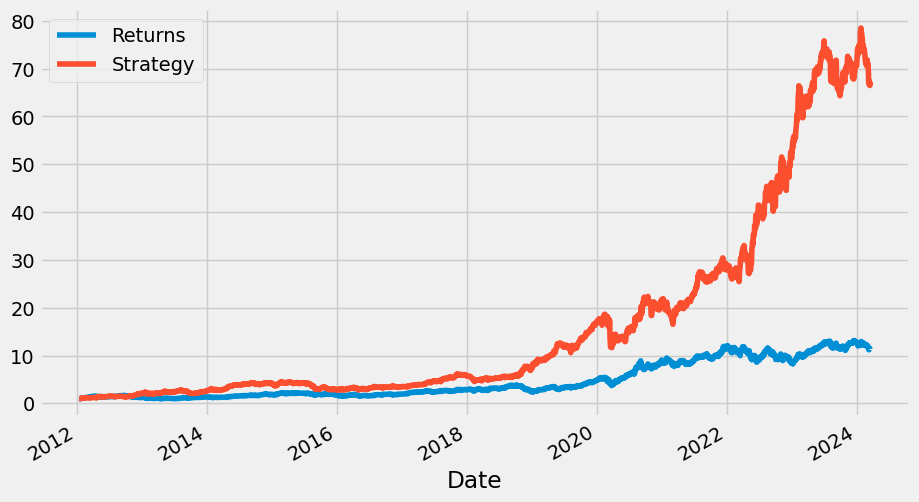

In [14]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

<Axes: xlabel='Date'>

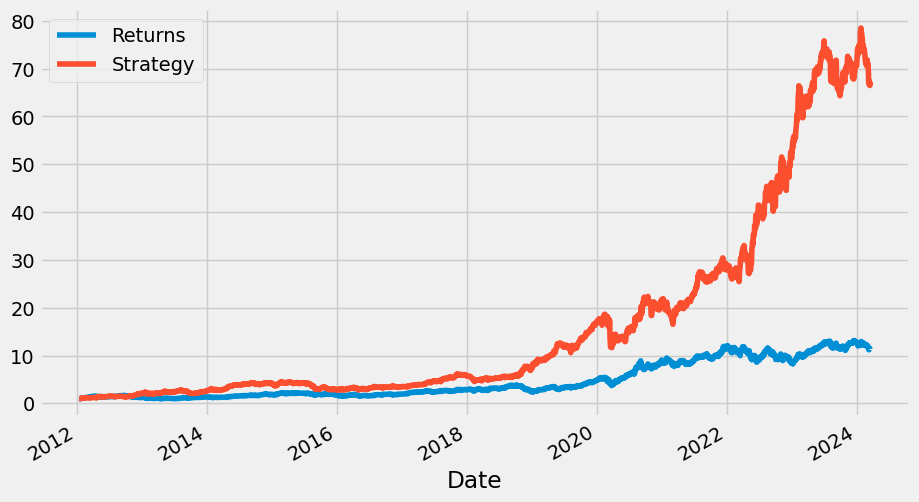

In [15]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

1. Create another Forecast data with log return

In [16]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 48.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.4 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0


In [93]:
from sktime.forecasting.naive import NaiveForecaster
import pandas as pd

#Copy the Close data and assign to new set of data
New_X = data['Close'].copy()

In [94]:
#The datetime type of index is DatetimeIndex, to work with sktime predict, we need to change it into PeriodIndex with frequency of day
New_X

Date
2012-01-12     15.049643
2012-01-13     14.993214
2012-01-17     15.167857
2012-01-18     15.325357
2012-01-19     15.276786
                 ...    
2024-03-07    169.000000
2024-03-08    170.729996
2024-03-11    172.750000
2024-03-12    173.229996
2024-03-13    171.130005
Name: Close, Length: 3061, dtype: float64

In [ ]:
#Use the pd.index.to_period('D') to change the DatetimeIndex into PeriodIndex
New_X.index = New_X.index.rename('NaN')

: 

In [91]:
New_X

None
2012-01-12     15.049643
2012-01-13     14.993214
2012-01-17     15.167857
2012-01-18     15.325357
2012-01-19     15.276786
                 ...    
2024-03-07    169.000000
2024-03-08    170.729996
2024-03-11    172.750000
2024-03-12    173.229996
2024-03-13    171.130005
Name: Close, Length: 3061, dtype: float64

In [71]:
New_X.name= None

In [72]:
New_X

Date
2012-01-12     15.049643
2012-01-13     14.993214
2012-01-17     15.167857
2012-01-18     15.325357
2012-01-19     15.276786
                 ...    
2024-03-07    169.000000
2024-03-08    170.729996
2024-03-11    172.750000
2024-03-12    173.229996
2024-03-13    171.130005
Length: 3061, dtype: float64

In [64]:
#I have tried the reproduce here and it seems to work with both the index
index = pd.period_range('2024-01-01', periods=10)
index = pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'])
y = pd.Series(
    data=range(len(index)),
    index=index
)

Fore_y = NaiveForecaster().fit_predict(y, fh=[1, 2, 3])

In [66]:
y

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
2024-01-06    5
2024-01-07    6
2024-01-08    7
2024-01-09    8
2024-01-10    9
dtype: int64

In [37]:
Fore_y

2024-01-11    9.0
2024-01-12    9.0
2024-01-13    9.0
dtype: float64

In [75]:
import pandas as pd
#Set a forecast horizon, let's say we want 10 days forecast
fh = range(1, 3)

#Specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy='last', sp=24)

#fitting the forecaster with New_X
#forecaster.fit(New_X)

#Querying predictions with set forecasting horizon
Fore_X = forecaster.fit_predict(New_X, fh)


TypeError: Unsupported input data type in NaiveForecaster, input X must be in an sktime compatible format. Allowed scitypes for X in forecasting are None, Series, Panel, Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynb See the data format tutorial examples/AA_datatypes_and_datasets.ipynb. If you think the data is already in an sktime supported input format, run sktime.datatypes.check_raise(data, mtype) to diagnose the error, where mtype is the string of the type specification you want. Error message for checked mtypes, in format [mtype: message], as follows: [pd.DataFrame: X must be a pandas.DataFrame, found <class 'range'>]  [pd.Series: X must be a pandas.Series, found <class 'range'>]  [np.ndarray: X must be a numpy.ndarray, found <class 'range'>]  [df-list: X must be list of pd.DataFrame, found <class 'range'>]  [numpy3D: X must be a numpy.ndarray, found <class 'range'>]  [pd-multiindex: X must be a pd.DataFrame, found <class 'range'>]  [nested_univ: X must be a pd.DataFrame, found <class 'range'>]  [pd_multiindex_hier: X must be a pd.DataFrame, found <class 'range'>] 

In [22]:
Fore_X

2024-03-13    194.169998
2024-03-14    192.419998
2024-03-15    181.559998
2024-03-16    182.320007
2024-03-17    184.369995
2024-03-18    182.520004
2024-03-19    184.399994
2024-03-20    186.860001
2024-03-21    181.160004
2024-03-22    182.630005
2024-03-23    181.419998
2024-03-24    180.750000
2024-03-25    179.660004
2024-03-26    189.410004
2024-03-27    188.320007
2024-03-28    175.100006
2024-03-29    170.119995
2024-03-30    169.119995
2024-03-31    169.000000
2024-04-01    170.729996
2024-04-02    184.149994
2024-04-03    183.860001
2024-04-04    172.750000
2024-04-05    173.229996
2024-04-06    171.130005
2024-04-07    192.419998
2024-04-08    181.559998
2024-04-09    182.320007
2024-04-10    184.369995
2024-04-11    182.520004
2024-04-12    184.399994
2024-04-13    186.860001
2024-04-14    181.160004
2024-04-15    182.630005
2024-04-16    181.419998
2024-04-17    180.750000
2024-04-18    179.660004
2024-04-19    189.410004
2024-04-20    188.320007
2024-04-21    175.100006


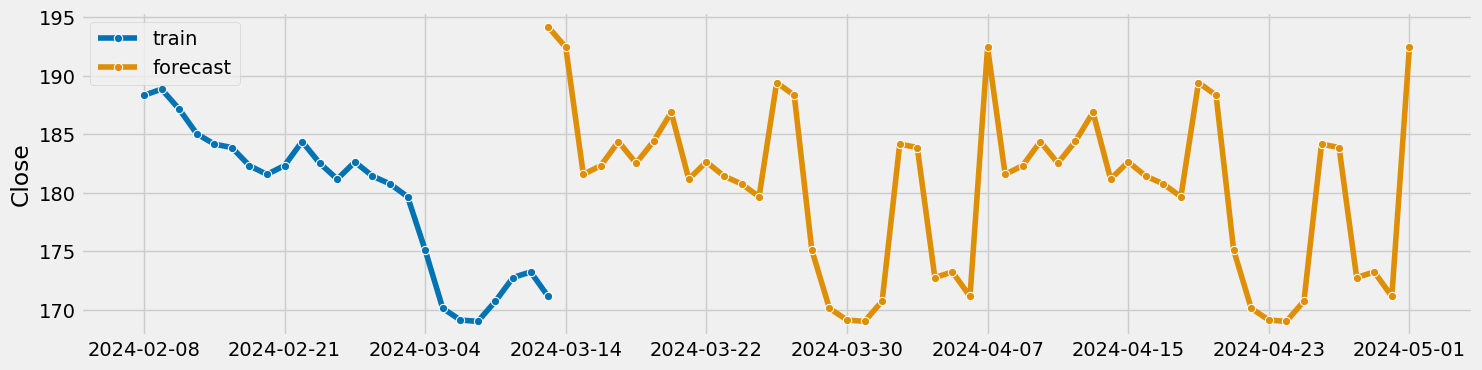

In [23]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(New_X[-24:], Fore_X, labels=["train", "forecast"])